<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Machine Learning Introduction  

### Making a Variety of Predictive Machine Learning Models in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### Multiple Machine Learning Models for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of training multiple machine learning models with a single dataset.  

* This is provided as a fast comparison of general behavoir of these models

* I demonstration model training and tuning (automatically and by-hand)

* Given the 2 predictor features and 1 response feature it is easy to visualize the data and the model

This provides an opportunity to run and visualize a variety of machine learning models for experiential learning.

#### Machine Learning-based Prediction

Predictive machine learning methods with supervised learning: 

**Prediction**

* non-parametric method for regression and classification

* a function $\hat{f}$ of the nearest $k$ training data in predictor feature space such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form $\hat{Y} = \hat{f}(X_1,\ldots,X_m)$ 

**Suppervised Learning**

* the response feature label, $Y$, is available over the training and testing data

#### The Machine Learning Models

This workflow includes the following models:

* linear regression
* k-nearest neighbor regression
* decision tree regression
* random forest regression
* tree-based gradient boosting regression  

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

If you want to work locally you will need to first copy the data file to your working directory. It is available here:

* Tabular data - unconv_MV.csv found [here](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV.csv).

You don't have to download the data if you want to load directly from my github account with the code below.

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

In [1]:
import os                                                   # to set current working directory 
import math                                                 # basic calculations like square root
import pandas as pd                                         # DataFrames and plotting
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
import matplotlib.ticker as ticker                          # modify the plot axis labels
from sklearn.model_selection import train_test_split        # train and test split
from sklearn.pipeline import Pipeline                       # machine learning modeling pipeline
from sklearn.model_selection import GridSearchCV            # model hyperparameter grid search
from sklearn.model_selection import KFold                   # k-fold cross validation
from sklearn.preprocessing import StandardScaler            # feature standardization
np.random.seed(seed=73038)

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

Let's define a couple of convenience functions for model visualization and hyperparameter tuning. 

In [2]:
def visualize_model(model,xtrain,xtest,x_min,x_max,ytrain,ytest,y_min,y_max,rtrain,rtest,z_min,z_max,title,colorbar=True):# plots the data points and the decision tree prediction 
    n_classes = 10
    #cmap = plt.cm.RdYlBu
    cmap = plt.cm.plasma
    plot_step = max((x_max-x_min),(y_max-y_min))/200
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.clip(Z,z_min,z_max)
    Z = Z.reshape(xx.shape)
    #cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))
    cs = plt.imshow(Z,interpolation = None,extent = [x_min,x_max,y_min,y_max], vmin = z_min, vmax = z_max,cmap = cmap)

    im = plt.scatter(xtrain,ytrain,s=None, c=rtrain, marker='o', cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.5, verts=None, edgecolors="white",label='train')
    im2 = plt.scatter(xtest,ytest,s=None, c=rtest, marker='s', cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.5, verts=None, edgecolors="black",label='test')
    plt.xlim([x_min,x_max]); plt.ylim([y_min,y_max])
    plt.title(title)
    plt.xlabel(xtrain.name)
    plt.ylabel(ytrain.name)
    plt.legend(loc = 'upper right')
    if colorbar == True:
      cbar = plt.colorbar(im, orientation = 'vertical')
      cbar.set_label(rtrain.name, rotation=270, labelpad=20)
        
def visualize_model_sub(ax,model,xtrain,xtest,x_min,x_max,ytrain,ytest,y_min,y_max,rtrain,rtest,z_min,z_max,title,legend=True):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    cmap = plt.cm.plasma
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.clip(Z,z_min,z_max)
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))
    im = ax.scatter(xtrain,ytrain,s=None, c=rtrain, marker='o', cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.5, verts=None, edgecolors="white",label='train')
    im2 = ax.scatter(xtest,ytest,s=None, c=rtest, marker='s', cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.5, verts=None, edgecolors="black",label='test')   
    ax.set_title(title)
    ax.set_xlabel(xtrain.name)
    ax.set_ylabel(ytrain.name)
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    if legend == True:
      cbar = plt.colorbar(im, orientation = 'vertical')
      cbar.set_label(rtrain.name, rotation=270, labelpad=20)    
        
def tune_model(model,X,y,par_name,par_min,par_max,npar,spar,log_scale,int_list,title,xlabel):
    scorelist = []
    if log_scale:
        parlist = np.logspace(math.log10(par_min),math.log10(par_max),npar)
    else: 
        if int_list == True:
            step = int((par_max-par_min)/npar)
            parlist = np.arange(par_min,par_max+1,step,dtype = int)
        else:
            parlist = np.linspace(par_min,par_max,npar)

    pipe = Pipeline([                                           # the machine learning workflow as a pipeline object
        ('model', model)
    ])

    params = {                                                  # the machine learning workflow method's parameters
        'model__' + str(par_name): parlist,
    }
    folds = 4
    grid_cv_tuned = GridSearchCV(pipe, params, scoring = 'neg_mean_squared_error', # grid search cross validation 
                             cv=KFold(n_splits=folds,shuffle=False),
                             refit = True)

    grid_cv_tuned.fit(X,y)                                      # fit model with tuned hyperparameters        
        
    scorelist = abs(grid_cv_tuned.cv_results_['mean_test_score'])   
    
    if log_scale:    
        plt.arrow(parlist[np.argmin(scorelist)],0,0,np.max(scorelist)*1.2,width=parlist[np.argmin(scorelist)]/10.0,color='red',head_length=0.0,head_width=0.0)    
        plt.arrow(spar,0,0,np.max(scorelist)*1.2,width=spar/10.0,color='black',head_length=0.0,head_width=0.0)
    else:
        plt.arrow(parlist[np.argmin(scorelist)],0,0,np.max(scorelist)*1.2,width=1,color='red',head_length=0.0,head_width=0.0)    
        plt.arrow(spar,0,0,np.max(scorelist)*1.2,width=0.5,color='black',head_length=0.0,head_width=0.0)
    
    plt.annotate('Your Model',[spar,np.max(scorelist)*0.95],rotation=270.0)
    if int_list == True:
        plt.annotate('Tuned Model, ' + xlabel + ' = ' + str(format(parlist[np.argmin(scorelist)],"d")),[parlist[np.argmin(scorelist)],np.max(scorelist)*0.4],rotation=270.0)
    else:
        plt.annotate('Tuned Model, ' + xlabel + ' = ' + str(format(parlist[np.argmin(scorelist)],"4.3f")),[parlist[np.argmin(scorelist)],np.max(scorelist)*0.4],rotation=270.0)

        
    plt.scatter(parlist,scorelist,s=5, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.5, verts=None, edgecolors="black")
    y_labels = plt.gca().get_yticks()
    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))
    plt.title(title); plt.xlabel(xlabel); plt.ylabel('Mean Square Error')
    if log_scale:
        plt.xscale('log'); 
    plt.xlim(par_min,par_max); plt.ylim(1.0,np.max(scorelist)*1.2)
    
def check_model(model,xtrain,xtest,ytrain,ytest,rtrain,rtest,rmin,rmax,title):    # plots the estimated vs. the actual  
    predict_train = model.predict(np.c_[xtrain,ytrain])
    predict_test = model.predict(np.c_[xtest,ytest])
    plt.scatter(rtrain,predict_train,s=None, c='red',marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.3, verts=None, edgecolors="black", label = 'train')
    plt.scatter(rtest,predict_test,s=None, c='blue',marker='s', cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.3, verts=None, edgecolors="black", label = 'test')
    plt.title(title); plt.xlabel('Actual Production (MCFPD)'); plt.ylabel('Estimated Production (MCFPD)')
    plt.xlim(rmin,rmax); plt.ylim(rmin,rmax)
    plt.legend(loc = 'upper right')
    plt.arrow(rmin,rmin,rmax,rmax,width=0.02,color='black',head_length=0.0,head_width=0.0)

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).

* I include this for convience if you want to write out results or load the data file locally

In [3]:
#os.chdir("c:/PGE383")                                       # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Read the data table

We use a data "unconv_MV.csv" comma delimited file from my GitHub [respository](https://github.com/GeostatsGuy/GeoDataSets).  

* this code loads the data directly from my GitHub repository.
* if you have the data file available locally (i.e. you are not connected to the internet) set the working directory to the location with the data file and use the second line below

In [4]:
my_data = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv")   # load the comma delimited data file
#my_data = pd.read_csv("unconv_MV.csv")                     # load the comma delimited data file locally
my_data = my_data.sample(frac = 0.2)                        # reduce the number of data for testing and visualization
num = my_data._get_numeric_data()                           # get the numerical values
production_error = 1500                                     # adjust the error in the response feature
my_data['Production'] = my_data['Production'] + np.random.normal(loc=0.0,scale=production_error,size=len(my_data))
num[num < 0] = 0                                            # truncate negative values to 0.0

Let's visualize the first several rows of our data stored in a DataFrame so we can make sure we successfully loaded the data file.

In [5]:
my_data.head(n=3)                                           # preview the first 3 rows of the dataframe

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
262,263,18.59,1.98,1.91,56.49,0.92,1.57,4196.571056
785,786,23.31,2.27,2.72,17.93,2.04,2.19,1117.707449
855,856,13.67,1.14,2.89,28.69,0.62,1.73,1306.847675


Let's remove the well index and check the summary summary statistics.

In [6]:
my_data = my_data.iloc[:,1:8]                               # copy all rows and columns 1 through 8, note 0 column is removed
my_data.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,200.0,14.99170,3.111665,5.79,12.955000,15.035000,17.092500,24.650000
LogPerm,200.0,1.41340,0.404338,0.24,1.177500,1.415000,1.660000,2.580000
AI,200.0,3.01940,0.552788,1.33,2.685000,3.025000,3.352500,4.520000
Brittle,200.0,49.88965,14.801094,17.93,39.647500,49.885000,59.240000,89.450000
TOC,200.0,1.02490,0.499605,0.00,0.697500,1.010000,1.372500,2.230000
VR,200.0,2.02435,0.298912,0.90,1.837500,2.030000,2.190000,2.900000
Production,200.0,2424.08672,1916.796002,0.00,935.685819,2194.198856,3812.526316,11353.810415


#### Standardizing Predictor Features

The k-nearest neighbour etc. methods uses a nearest training sample search in feature space (like k-means clustering). To remove the impact feature range from the approach we standardize the features.

* we will standardize our predictor features to have a mean of zero and a variance of one.

* we use the scikikt learn preprocessing to simplify this step and provid a reverse transform.

We also extract the selected, transformed features as convenient DataFrames for the next workflow steps.

In [7]:
transform = StandardScaler(); 
features = ['Por','Brittle']

my_data['Standardized Porosity'] = transform.fit_transform(my_data.loc[:,features].values)[:,0] # standardize the data features to mean = 0, var = 1.0
my_data['Standardized Brittleness'] = transform.fit_transform(my_data.loc[:,features].values)[:,1] # standardize the data features to mean = 0, var = 1.0

X1 = my_data['Standardized Porosity']
X2 = my_data['Standardized Brittleness']
X = my_data[['Standardized Porosity','Standardized Brittleness']]
y = my_data['Production']
my_data.head(n=3)

,Por,LogPerm,AI,Brittle,TOC,VR,Production,Standardized Porosity,Standardized Brittleness
262,18.59,1.98,1.91,56.49,0.92,1.57,4196.571056,1.159293,0.447056
785,23.31,2.27,2.72,17.93,2.04,2.19,1117.707449,2.679972,-2.164695
855,13.67,1.14,2.89,28.69,0.62,1.73,1306.847675,-0.425822,-1.435897


We can compare the output above with the original porosity and brittleness. The reverse transform works! We will use it to return to the original feature units.

#### Feature Ranges

Let's set some ranges for plotting. Note for the standardized predictor features we will use -3.5 to 3.5 as the limits.

In [8]:
pormin = 5.0; pormax = 25.0                                 # set minumums and maximums for visualization 
brittlemin = 0.0; brittlemax = 100.0
prodmin = 0.0; prodmax = 9000.0

This dataset has variables from 1,000 unconventional wells including well average porosity, log transform of permeability (to linearize the relationships with other variables), accoustic impedance (kg/m2s*10^6), brittness ratio (%), total organic carbon (%), vitrinite reflectance (%), and initial production 90 day average (MCFPD).  Note, the dataset is synthetic.

#### Working with Only Two Predictor Features

Let's simplify the problem to 2 predictor features, Porosity and Brittleness to predict Production rate.  We will also reduce the number of wells from 1,000 to 500.  By working with only 2 features, it is very easy to visualize the segmentation of the feature space (it is only 2D and can be shown compleltely on a single plot).

In [9]:
my_data_subset = my_data.iloc[:,[7,8,6]]                    # extract just por, brittle and prod with 100 samples
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=73073)
X1_train = X_train.iloc[:,0]; X2_train = X_train.iloc[:,1]; X1_test = X_test.iloc[:,0]; X2_test = X_test.iloc[:,1]; 
y_train = pd.DataFrame({'Production':y_train.values})       # force the response feature to be a DataFrame instead of a 1D ndarray
y_test = pd.DataFrame({'Production':y_test.values})

Let's first check the univariate statistics of Porosity, Brittleness and Producton.

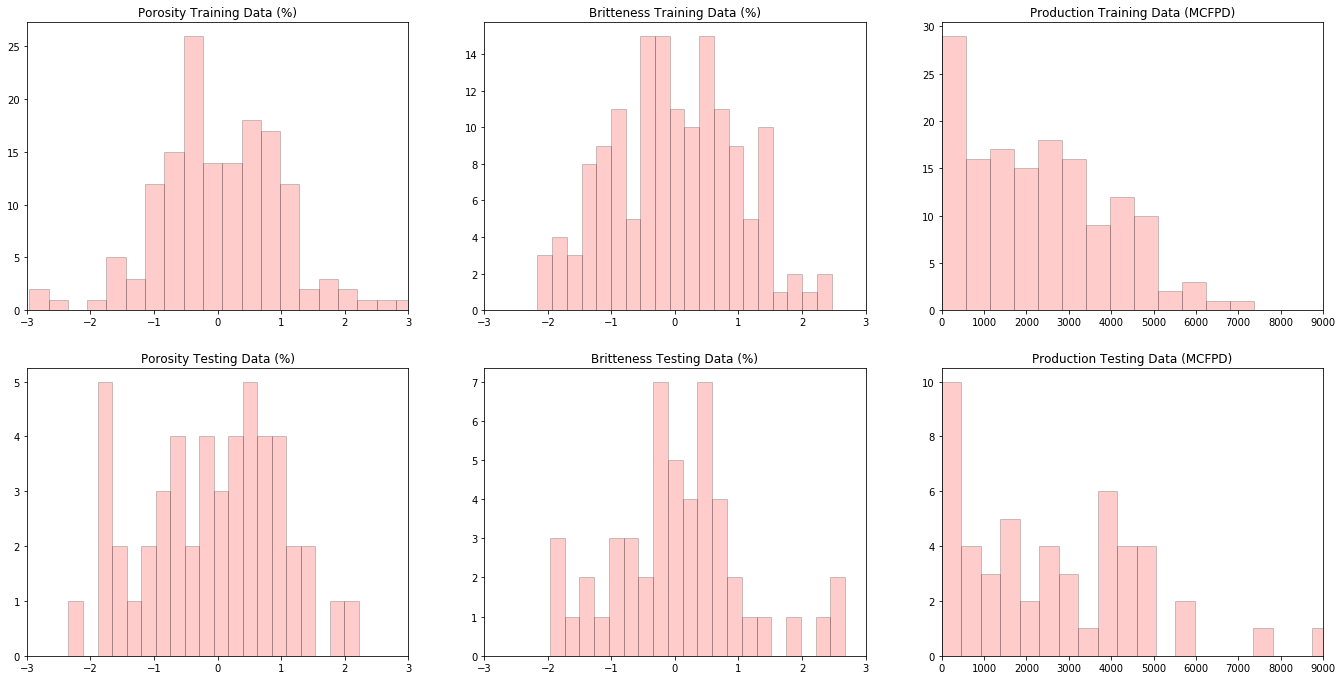

In [10]:
plt.subplot(231)
plt.hist(X1_train, alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Porosity Training Data (%)'); plt.xlim(-3,3)

plt.subplot(232)
plt.hist(X_train.iloc[:,1], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Britteness Training Data (%)'); plt.xlim(-3,3)

plt.subplot(233)
plt.hist(y_train.iloc[:,0], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Production Training Data (MCFPD)'); plt.xlim(prodmin,prodmax)

plt.subplot(234)
plt.hist(X_test.iloc[:,0], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Porosity Testing Data (%)'); plt.xlim(-3,3)

plt.subplot(235)
plt.hist(X_test.iloc[:,1], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Britteness Testing Data (%)'); plt.xlim(-3,3)

plt.subplot(236)
plt.hist(y_test.iloc[:,0], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Production Testing Data (MCFPD)'); plt.xlim(prodmin,prodmax)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.2, wspace=0.2, hspace=0.2)
plt.show()

The distributions are well behaved, we cannot observe obvious gaps nor truncations.  Let's look at a scatter plot of Porosity vs. Brittleness with points colored by Production.

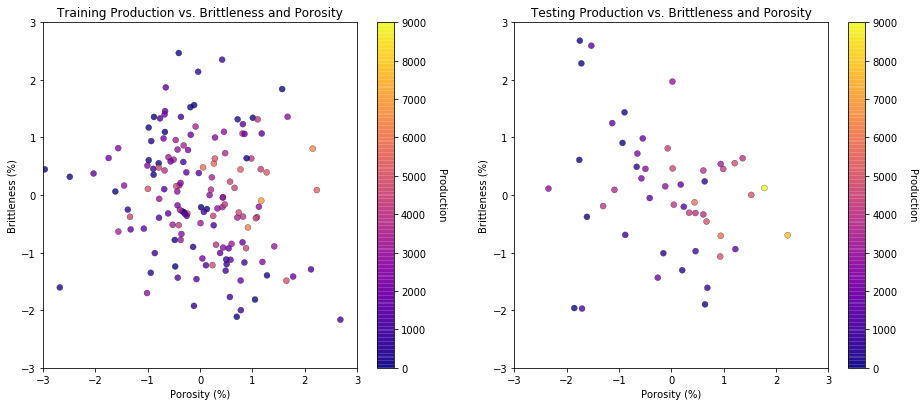

In [11]:
plt.subplot(121)
im = plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],s=None, c=y_train.iloc[:,0], marker=None, cmap=plt.cm.plasma, norm=None, vmin=prodmin, vmax=prodmax, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Training Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
plt.xlim(-3,3); plt.ylim(-3,3)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplot(122)
im = plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],s=None, c=y_test.iloc[:,0], marker=None, cmap=plt.cm.plasma, norm=None, vmin=prodmin, vmax=prodmax, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Testing Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
plt.xlim(-3,3); plt.ylim(-3,3)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

This problem looks complicated and could not be modeled with simple linear regression.  It appears there is a sweet spot for Brittleness and increasing Porosity is always beneficial for Production.

#### Play with a Variety of Machine Learning Models

Let's try out several machine learning prediction models to predict production with the porosity and brittleness data.

Here's our machine learning prediction model:

\begin{equation}
production = f(porosity,brittleness) + \epsilon
\end{equation}

We will show use the following models:

* multilinear regression [Lecture](https://www.youtube.com/watch?v=0fzbyhWiP84&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=21)
* ridge regression [Lecture](https://www.youtube.com/watch?v=pMGO40yXZ5Y&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=22)
* k-nearest nearbours [Lecture](https://www.youtube.com/watch?v=lzmeChSYvv8&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=30)
* decision tree [Lecture](https://www.youtube.com/watch?v=JUGo1Pu3QT4&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=38)
* random forest [Lecture](https://www.youtube.com/watch?v=m5_wk310fho&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=39)
* gradient boosting [Lecture](https://www.youtube.com/watch?v=___T8_ixIwc&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=40)

check out the links for lectures on my YouTube channel for each. 

* I have a lot of lectures available on machine learning in the Subsurface Machine Learning [Playlist](https://www.youtube.com/watch?v=5kBS5ThMHcU&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf) 

___

#### Instantiate, Fit and Predict with Multilinear Regression

Let's instantiate, fit and predict with a linear regression model.

Trying Out Hyperparameters:

* there are no hyperparameters to try out with linear regression, standard linear regression does not have an option to tune model complexity / flexibility
* changing the norm from L2 (not commonly done, but demonstrated [here](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/Interactive_Norms.ipynb)) changes sensitivity to the training data

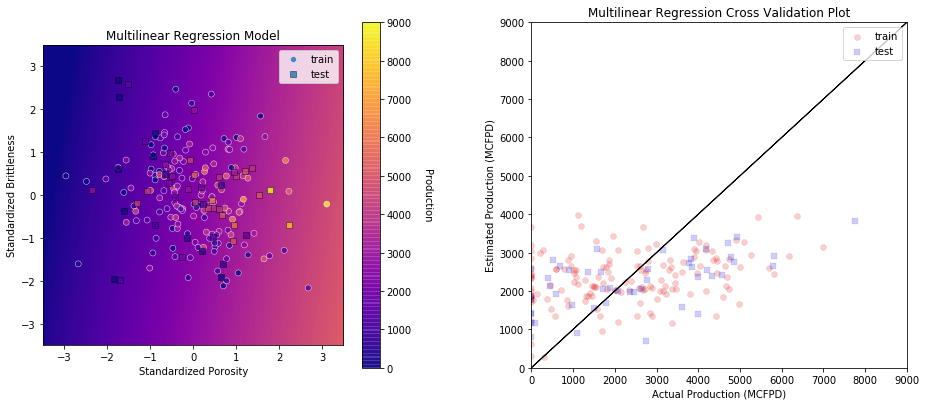

Model parameters are = 
  Slope X1 = 702.51 and slope X2 = 115.37
  Intercept = 2341.96
Testing mean square error = 3161931.6


In [12]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()                            # instantiate the prediction model
linear_model.fit(X_train,y_train)                    # train the model with the training data

plt.subplot(121)
visualize_model(linear_model,X_train.iloc[:,0],X_test.iloc[:,0],-3.5,3.5,X_train.iloc[:,1],X_test.iloc[:,1],-3.5,3.5,y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Multilinear Regression Model')
     
plt.subplot(122)    
check_model(linear_model,X_train.iloc[:,0],X_test.iloc[:,0],X_train.iloc[:,1],X_test.iloc[:,1],y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Multilinear Regression Cross Validation Plot')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

from sklearn import metrics                                 # measures to check our models
predict_test = linear_model.predict(np.c_[X_test.iloc[:,0],X_test.iloc[:,1]])
print('Model parameters are = ') 
print('  Slope X1 = ' + str(round(linear_model.coef_[0][0],2)) + ' and slope X2 = ' + str(round(linear_model.coef_[0][1],2)))
print('  Intercept = ' + str(round(linear_model.intercept_[0],2)))
print('Testing mean square error = ' + str(round(metrics.mean_squared_error(predict_test,y_test.iloc[:,0]),2)))

#### Instantiate, Fit and Predict with Ridge Regression

Let's instantiate, fit and predict with a linear regression model.

Trying Out Hyperparameters:

* $\lambda$ - the shrinkage factor applied to the shrinkage penalty, penalizes large absolute slope terms 

* linear regression alternative with hyperparamter tuning through regularization and feature selection:
   
    * LASSO [Lecture](https://www.youtube.com/watch?v=cVFYhlCCI_8&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=23)

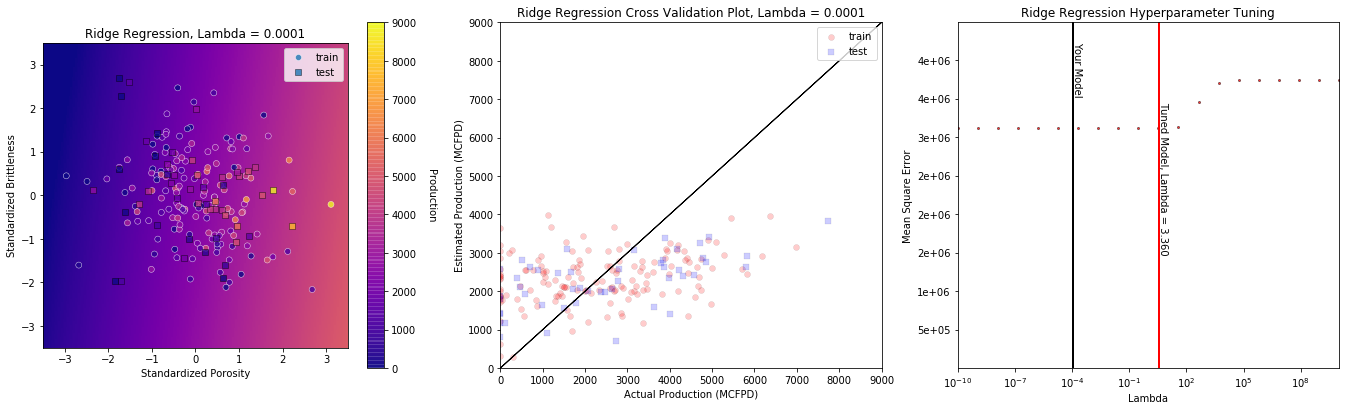

In [15]:
from sklearn.linear_model import Ridge

lam = 0.0001                                                  # hyperparameter
lam_min = 1.0e-10; lam_max = 1.0e10; nlam = 20                           

ridge_model = Ridge(alpha = lam)                             # instantiate the prediction model
ridge_model.fit(X_train,y_train)                             # train the model with the training data

plt.subplot(131)
visualize_model(ridge_model,X_train.iloc[:,0],X_test.iloc[:,0],-3.5,3.5,X_train.iloc[:,1],X_test.iloc[:,1],-3.5,3.5,y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Ridge Regression, Lambda = ' + str(lam))
    
plt.subplot(132)    
check_model(ridge_model,X_train.iloc[:,0],X_test.iloc[:,0],X_train.iloc[:,1],X_test.iloc[:,1],y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Ridge Regression Cross Validation Plot, Lambda = ' + str(lam))
    
plt.subplot(133)
tune_model(ridge_model,X,y,'alpha',lam_min,lam_max,nlam,lam,True,False,'Ridge Regression Hyperparameter Tuning','Lambda')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.5)
plt.show()

#### Instantiate, Fit and Predict with $k$ Nearest Neighbour

Let's instantiate, fit and predict with a $k$ nearest neighbour model.

* instantiate it with the hyperparameters, $k$ nearest neighbours 

* train with the training data, we use the standard fit function from scikit learn 

Trying Out Hyperparameters:

* **k** - number of nearest training data to use for the estimate
* **low k** - high model complexity / flexibility
* **high k** - low model complexity / flexibility

Just change this line of code below:

```python
k = 5                                                       # hyperparameter
```

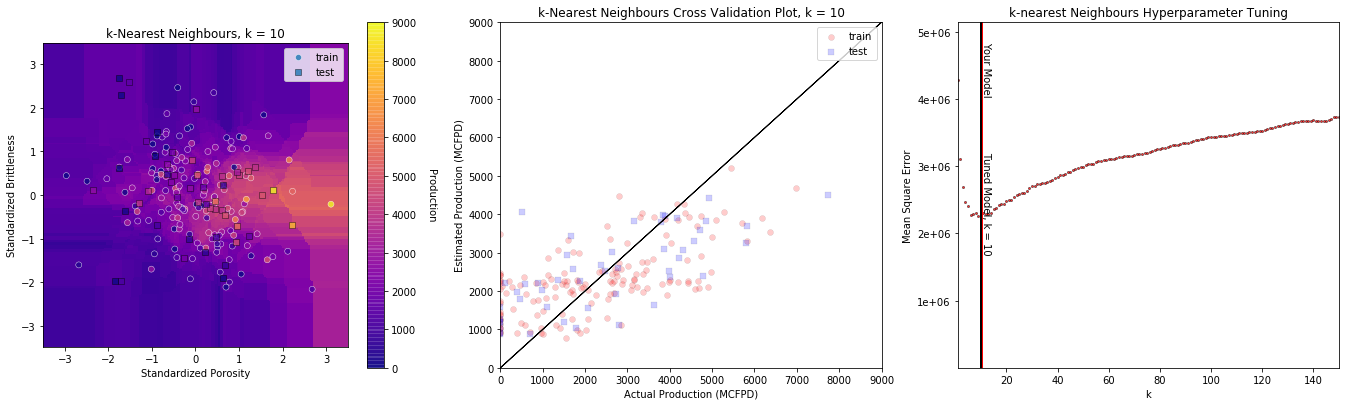

In [19]:
from sklearn.neighbors import KNeighborsRegressor          

k = 10                                                      # hyperparameter
k_min = 1; k_max=150; nk = 80                         

neigh_model = KNeighborsRegressor(weights = 'uniform', n_neighbors=k, p = 1) # instantiate the prediction model
neigh_model.fit(X_train,y_train)                            # train the model with the training data

plt.subplot(131)
visualize_model(neigh_model,X_train.iloc[:,0],X_test.iloc[:,0],-3.5,3.5,X_train.iloc[:,1],X_test.iloc[:,1],-3.5,3.5,y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'k-Nearest Neighbours, k = ' + str(k))
    
plt.subplot(132)    
check_model(neigh_model,X_train.iloc[:,0],X_test.iloc[:,0],X_train.iloc[:,1],X_test.iloc[:,1],y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'k-Nearest Neighbours Cross Validation Plot, k = ' + str(k))

plt.subplot(133)
tune_model(neigh_model,X,y,'n_neighbors',k_min,k_max,nk,k,False,True,'k-nearest Neighbours Hyperparameter Tuning','k')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.5)
plt.show()

#### Instantiate, Fit and Predict with Decision Tree Regression

Let's instantiate, fit and predict with a decision tree regression model.

Trying Out Hyperparameters:

* **max_leaf_nodes** - maximum number of regions, terminal nodes, in the decision tree, low **max_lead_nodes** - low model complexity / flexibility
* **min_samples_leaf** - minimum number of training data in a regions, terminal nodes, in the decision tree, low **min_samples_leaf** - high model complexity / flexibility
* **max_depth** - maximum number of decision tree layers, low **max_depth** - low modelcomplexity / flexibility

Just change these lines of code below:

```python
max_leaf_nodes = 20                                       # hyperparameters
min_samples_leaf = 2
max_depth = 10
```

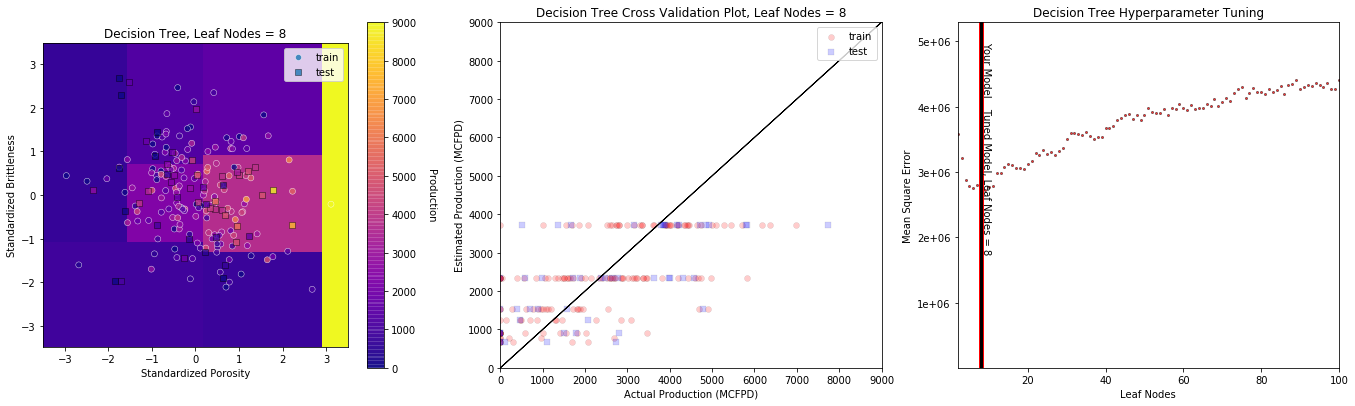

In [21]:
from sklearn import tree                                   # tree program from scikit learn (package for machine learning)

nodes = 8                                                 # hyperparameters
nodes_min = 2; nodes_max=100; nnodes = 80                         

tree_model = tree.DecisionTreeRegressor(max_leaf_nodes = nodes) # instantiate the prediction model
tree_model.fit(X_train,y_train)                            # train the model with the training data

plt.subplot(131)
visualize_model(tree_model,X_train.iloc[:,0],X_test.iloc[:,0],-3.5,3.5,X_train.iloc[:,1],X_test.iloc[:,1],-3.5,3.5,y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Decision Tree, Leaf Nodes = ' + str(nodes))
    
plt.subplot(132)    
check_model(tree_model,X_train.iloc[:,0],X_test.iloc[:,0],X_train.iloc[:,1],X_test.iloc[:,1],y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Decision Tree Cross Validation Plot, Leaf Nodes = ' + str(nodes))
    
plt.subplot(133)
tune_model(tree_model,X,y,'max_leaf_nodes',nodes_min,nodes_max,nnodes,nodes,False,True,'Decision Tree Hyperparameter Tuning','Leaf Nodes')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.5)
plt.show()

#### Instantiate, Fit and Predict with Tree-based Random Forest Regression

Let's instantiate, fit and predict with a random forest regression model.

Trying Out Hyperparameters:

* **max_leaf_nodes** - maximum number of regions, terminal nodes, in the individual decision trees

Other Model Hyperparameters:

* **max_depth** - maximum number of decision tree layers, low **max_depth** - low model complexity / flexibility
* **n_estimators** - the number of decision trees to average to make the ensemble estimate
* **max_features** - number of features to randomly select for each decision, if 2 you will get tree bagging regression

Just change these lines of code below:

```python
fnodes = 80                                               # hyperparameters
max_depth = 10                                            
n_estimators = 1000
max_features = 2
```

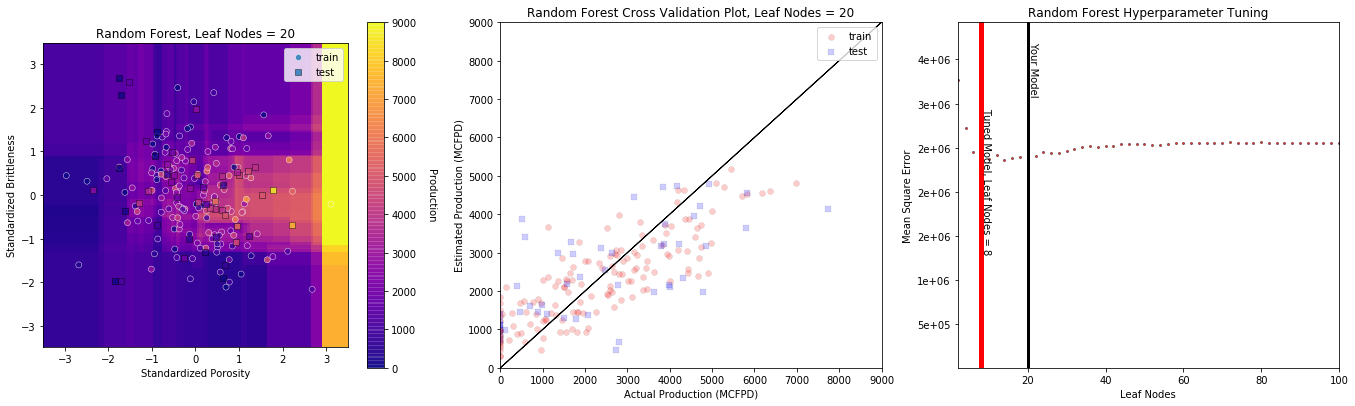

In [22]:
from sklearn.ensemble import RandomForestRegressor        

fnodes = 20                                              # hyperparameters
fnodes_min = 2; fnodes_max=100; fnnodes = 40              

max_depth = 10                                            
n_estimators = 10
max_features = 2

forest_model = RandomForestRegressor(max_leaf_nodes=fnodes,random_state=73073,n_estimators=n_estimators, max_features=max_features)
forest_model.fit(X_train,y_train.iloc[:,0])                         # train the model with training data 

plt.subplot(131)
visualize_model(forest_model,X_train.iloc[:,0],X_test.iloc[:,0],-3.5,3.5,X_train.iloc[:,1],X_test.iloc[:,1],-3.5,3.5,y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Random Forest, Leaf Nodes = ' + str(fnodes))
         
plt.subplot(132)    
check_model(forest_model,X_train.iloc[:,0],X_test.iloc[:,0],X_train.iloc[:,1],X_test.iloc[:,1],y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Random Forest Cross Validation Plot, Leaf Nodes = ' + str(fnodes))
  
plt.subplot(133)
tune_model(forest_model,X,y,'max_leaf_nodes',fnodes_min,fnodes_max,fnnodes,fnodes,False,True,'Random Forest Hyperparameter Tuning','Leaf Nodes')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.5)
plt.show()

#### Instantiate, Fit and Predict with Tree-based Gradient Boosting Regression

Let's instantiate, fit and predict with a tree-based gradient boosting regression model.

Trying Out Hyperparameters:

* **loss** - the loss function, 'ls' for least squares, L2 norm solution
* **max_depth** - maximum number of decision tree layers, low **max_depth** - low model complexity / flexibility for each additive model for less ability to capture feature interactions and slower learning 
* **learning_rate** - too fast and the solution may be unstable, diverge, and too slow and the solution make take too long

Just change these lines of code below:

```python
params = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth of each tree
    'learning_rate': 0.003,                                 # learning learning
    'criterion': 'mse'                                      # individual tree loss
}
```

Note, the above is a dictionary, a convenient Python class to flexibly store information, like the model hyperparameters.

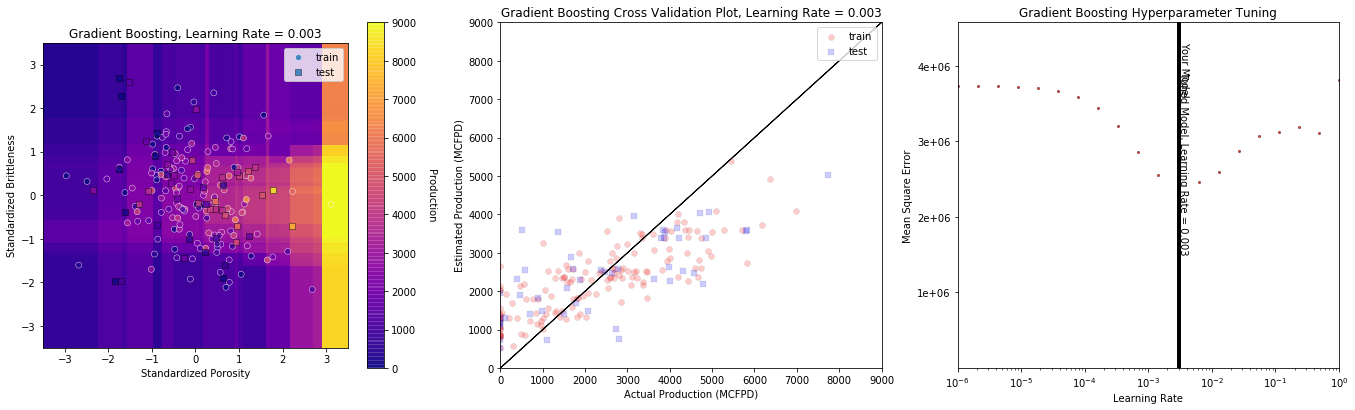

In [23]:
from sklearn.ensemble import GradientBoostingRegressor      # tree-based gradient boosting

learning_rate = 0.003                                      # hyperparamters
learning_rate_min = 0.000001; learning_rate_max = 1.0; learning_rate_n = 20

gnodes = 100                                                 
# gnodes_min = 2; gnodes_max=150; gnnodes = 20

params = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_leaf_nodes': gnodes,                               # maximum depth of each tree
    'learning_rate': learning_rate,                         # constraint on magnitude of update with each estimator / for slow, robust learning
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

gb_model = GradientBoostingRegressor(n_estimators=1000,**params) # instantiate the prediction model
gb_model.fit(X_train,y_train['Production'])                    # train the model with the training data

plt.subplot(131)
visualize_model(gb_model,X_train.iloc[:,0],X_test.iloc[:,0],-3.5,3.5,X_train.iloc[:,1],X_test.iloc[:,1],-3.5,3.5,y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Gradient Boosting, Learning Rate = ' + str(learning_rate))
 
plt.subplot(132)    
check_model(gb_model,X_train.iloc[:,0],X_test.iloc[:,0],X_train.iloc[:,1],X_test.iloc[:,1],y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Gradient Boosting Cross Validation Plot, Learning Rate = ' + str(learning_rate))
 
plt.subplot(133)
tune_model(gb_model,X,y,'learning_rate',learning_rate_min,learning_rate_max,learning_rate_n,learning_rate,True,False,'Gradient Boosting Hyperparameter Tuning','Learning Rate')
#tune_model(gb_model,X,y,'max_leaf_nodes',gnodes_min,gnodes_max,gnnodes,gnodes,False,True,'Decision Tree Hyperparameter Tuning','Leaf Nodes')
     
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Summary

Let's look at all our models together for a visual comparison.

In [ ]:
from matplotlib import gridspec
fig = plt.figure(constrained_layout=False)
gs = gridspec.GridSpec(1,6, figure=fig,width_ratios = [1,1,1,1,1,1.2] ) 

visualize_model_sub(plt.subplot(gs[0]),linear_model,X_train.iloc[:,0],X_test.iloc[:,0],-3.5,3.5,X_train.iloc[:,1],X_test.iloc[:,1],-3.5,3.5,y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Linear Model',legend=False)

visualize_model_sub(plt.subplot(gs[1]),ridge_model,X_train.iloc[:,0],X_test.iloc[:,0],-3.5,3.5,X_train.iloc[:,1],X_test.iloc[:,1],-3.5,3.5,y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Ridge Model, Lambda = ' + str(lam),legend=False)

visualize_model_sub(plt.subplot(gs[2]),neigh_model,X_train.iloc[:,0],X_test.iloc[:,0],-3.5,3.5,X_train.iloc[:,1],X_test.iloc[:,1],-3.5,3.5,y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'k-nearest Neighbour, k = ' + str(k),legend=False)

visualize_model_sub(plt.subplot(gs[3]),tree_model,X_train.iloc[:,0],X_test.iloc[:,0],-3.5,3.5,X_train.iloc[:,1],X_test.iloc[:,1],-3.5,3.5,y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Decision Tree, Leaf Nodes = ' + str(nodes),legend=False)

visualize_model_sub(plt.subplot(gs[4]),forest_model,X_train.iloc[:,0],X_test.iloc[:,0],-3.5,3.5,X_train.iloc[:,1],X_test.iloc[:,1],-3.5,3.5,y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Random Forest, Leaf Nodes = ' + str(fnodes),legend=False)

visualize_model_sub(plt.subplot(gs[5]),gb_model,X_train.iloc[:,0],X_test.iloc[:,0],-3.5,3.5,X_train.iloc[:,1],X_test.iloc[:,1],-3.5,3.5,y_train.iloc[:,0],y_test.iloc[:,0],prodmin,prodmax,'Gradient Boosting, Leaf Nodes = ' + str(gnodes),legend=True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=6, top=1.2, wspace=0.15, hspace=0.2)

fig.savefig('Multiple_ML_Models.jpg',dpi = 400, bbox_inches = 'tight')

plt.show()

#### Comments

We just ran fast to build a variety of machine learning models with model parameter training and hyperparameter tuning. 

* I hope this was a help demonstration.

* See the linked lectures at the beginning of this workflow for much more information about machine learning.

I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
